**HOUSE PRICE PREDICTION**

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [352]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [353]:
# check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [354]:
# removing null values as the null value count is very minimal(~200) compared to size of dataset
data.dropna(inplace = True)

In [355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [356]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [357]:
y = data['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [358]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [359]:
training_data = x_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8239,-118.18,33.77,36.0,1833.0,688.0,1128.0,620.0,1.1483,NEAR OCEAN,112500.0
5485,-118.46,33.99,35.0,1214.0,300.0,478.0,265.0,4.0156,<1H OCEAN,500001.0
12813,-121.49,38.63,6.0,12197.0,2617.0,5634.0,2329.0,3.7449,INLAND,129300.0
369,-122.15,37.75,40.0,1445.0,256.0,849.0,255.0,3.8913,NEAR BAY,126300.0
17464,-119.88,34.42,22.0,2367.0,492.0,1333.0,488.0,3.6304,NEAR OCEAN,312200.0
...,...,...,...,...,...,...,...,...,...,...
2440,-119.60,36.57,42.0,2311.0,439.0,1347.0,436.0,2.5556,INLAND,69700.0
17060,-122.24,37.49,30.0,2956.0,590.0,1191.0,594.0,3.7463,NEAR OCEAN,427600.0
8445,-118.37,33.91,35.0,1742.0,283.0,812.0,282.0,5.6704,<1H OCEAN,303700.0
16801,-122.41,37.66,37.0,2155.0,446.0,1255.0,428.0,3.8438,NEAR OCEAN,250700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

<Figure size 1500x500 with 0 Axes>

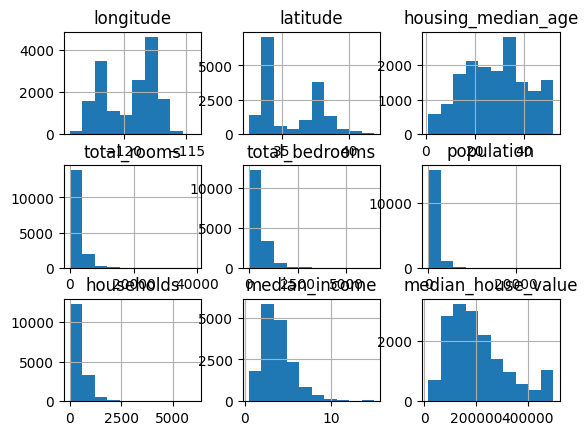

In [360]:
plt.figure(figsize = (15,5))
training_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

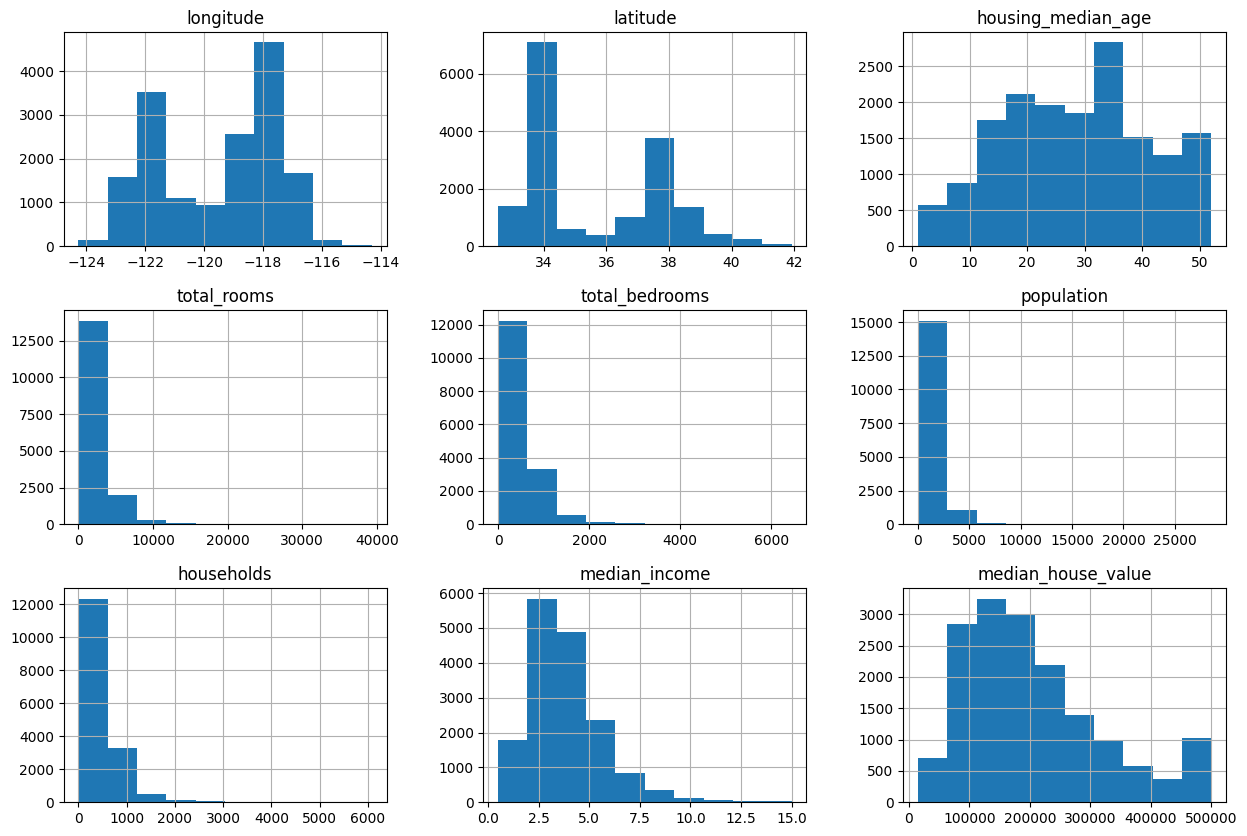

In [361]:
training_data.hist(figsize=(15,10))

In [362]:
new_training_data = training_data.drop(['ocean_proximity'], axis = 1)
new_training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8239,-118.18,33.77,36.0,1833.0,688.0,1128.0,620.0,1.1483,112500.0
5485,-118.46,33.99,35.0,1214.0,300.0,478.0,265.0,4.0156,500001.0
12813,-121.49,38.63,6.0,12197.0,2617.0,5634.0,2329.0,3.7449,129300.0
369,-122.15,37.75,40.0,1445.0,256.0,849.0,255.0,3.8913,126300.0
17464,-119.88,34.42,22.0,2367.0,492.0,1333.0,488.0,3.6304,312200.0
...,...,...,...,...,...,...,...,...,...
2440,-119.60,36.57,42.0,2311.0,439.0,1347.0,436.0,2.5556,69700.0
17060,-122.24,37.49,30.0,2956.0,590.0,1191.0,594.0,3.7463,427600.0
8445,-118.37,33.91,35.0,1742.0,283.0,812.0,282.0,5.6704,303700.0
16801,-122.41,37.66,37.0,2155.0,446.0,1255.0,428.0,3.8438,250700.0


In [363]:
new_training_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924124,-0.110033,0.044229,0.067504,0.097384,0.054487,-0.017439,-0.050924
latitude,-0.924124,1.000000,0.011924,-0.035758,-0.065126,-0.106353,-0.070242,-0.079867,-0.140808
housing_median_age,-0.110033,0.011924,1.000000,-0.356314,-0.317548,-0.299335,-0.300381,-0.116250,0.113772
total_rooms,0.044229,-0.035758,-0.356314,1.000000,0.931101,0.865101,0.919538,0.196514,0.133052
total_bedrooms,0.067504,-0.065126,-0.317548,0.931101,1.000000,0.885940,0.979770,-0.005870,0.051720
population,0.097384,-0.106353,-0.299335,0.865101,0.885940,1.000000,0.914848,0.007297,-0.024028
households,0.054487,-0.070242,-0.300381,0.919538,0.979770,0.914848,1.000000,0.015189,0.067105
median_income,-0.017439,-0.079867,-0.116250,0.196514,-0.005870,0.007297,0.015189,1.000000,0.687740
median_house_value,-0.050924,-0.140808,0.113772,0.133052,0.051720,-0.024028,0.067105,0.687740,1.000000


<Axes: >

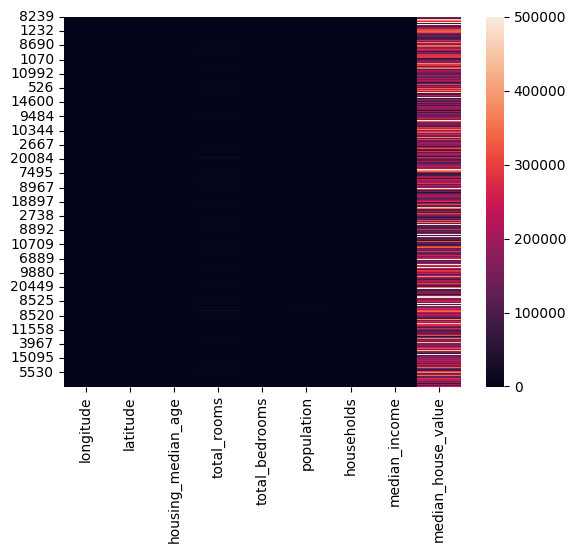

In [364]:
sns.heatmap(new_training_data)

<Axes: >

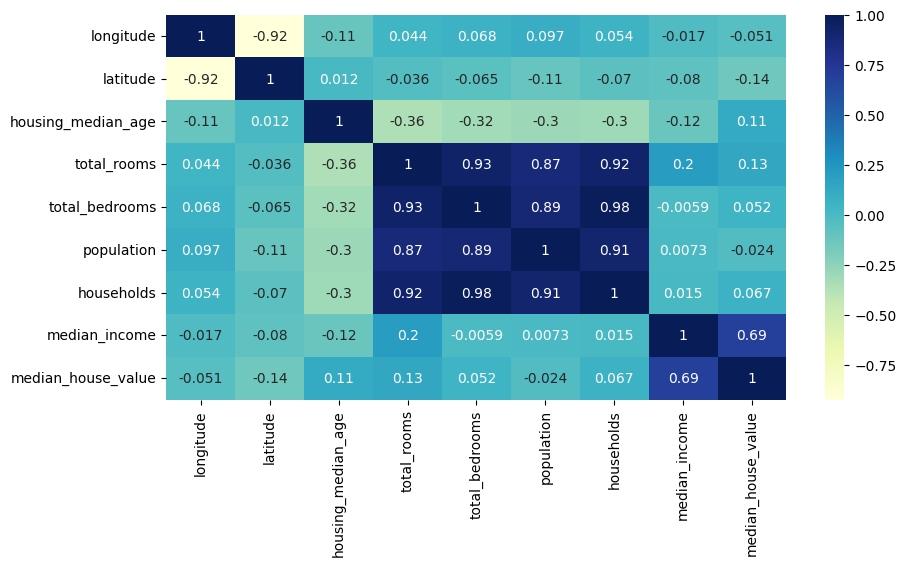

In [365]:
plt.figure(figsize = (10,5))
sns.heatmap(new_training_data.corr(), annot = True, cmap = 'YlGnBu')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

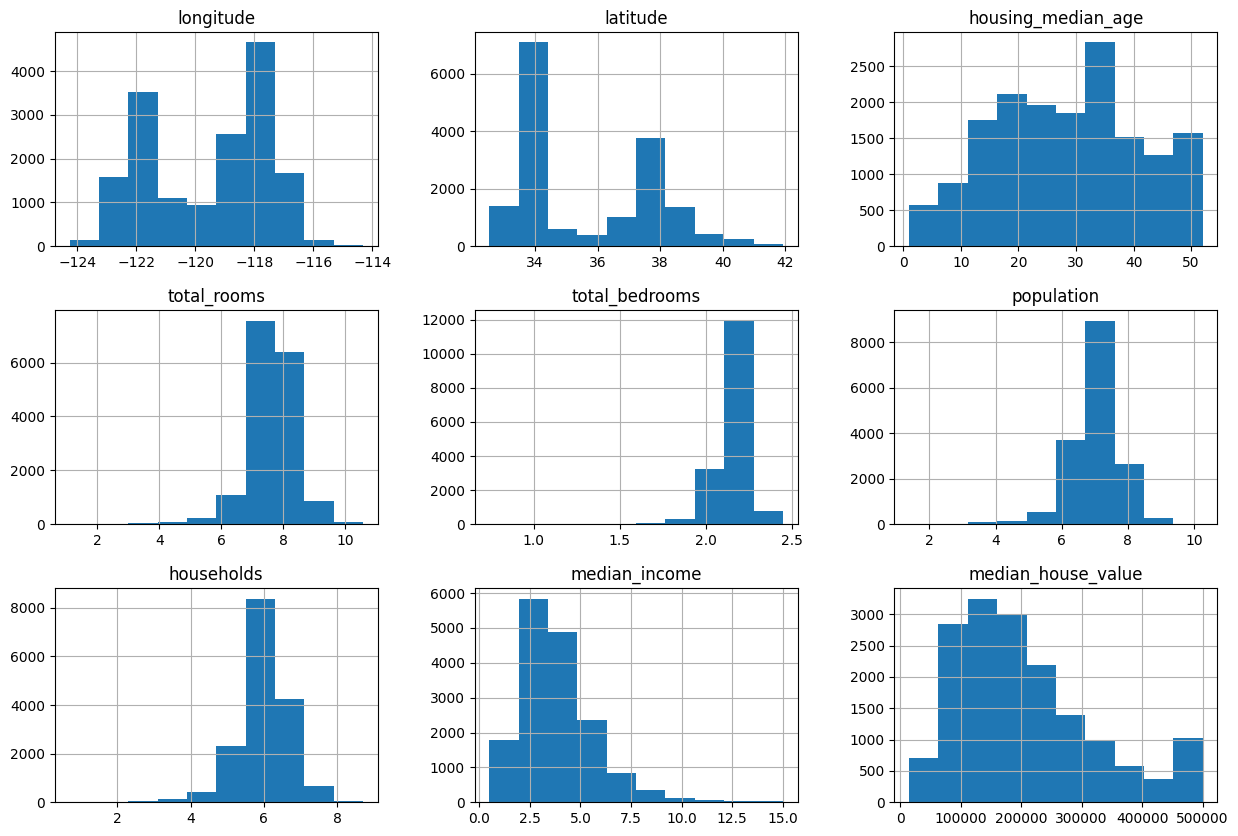

In [366]:
# pre-processing data to get a Gaussian Bell Curve plot in histogram
new_training_data['total_rooms'] = np.log(new_training_data['total_rooms'] + 1)
new_training_data['total_bedrooms'] = np.log(new_training_data['total_rooms'] + 1)
new_training_data['population'] = np.log(new_training_data['population'] + 1)
new_training_data['households'] = np.log(new_training_data['households'] + 1)

new_training_data.hist(figsize = (15,10))

In [367]:
training_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7201
INLAND        5218
NEAR OCEAN    2077
NEAR BAY      1846
ISLAND           4
Name: count, dtype: int64

In [368]:
# encoding the 'ocean_proximity' column
pd.get_dummies(training_data.ocean_proximity, dtype = int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8239,0,0,0,0,1
5485,1,0,0,0,0
12813,0,1,0,0,0
369,0,0,0,1,0
17464,0,0,0,0,1
...,...,...,...,...,...
2440,0,1,0,0,0
17060,0,0,0,0,1
8445,1,0,0,0,0
16801,0,0,0,0,1


In [369]:
training_data = training_data.join(pd.get_dummies(training_data.ocean_proximity, dtype = int))
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8239,-118.18,33.77,36.0,1833.0,688.0,1128.0,620.0,1.1483,NEAR OCEAN,112500.0,0,0,0,0,1
5485,-118.46,33.99,35.0,1214.0,300.0,478.0,265.0,4.0156,<1H OCEAN,500001.0,1,0,0,0,0
12813,-121.49,38.63,6.0,12197.0,2617.0,5634.0,2329.0,3.7449,INLAND,129300.0,0,1,0,0,0
369,-122.15,37.75,40.0,1445.0,256.0,849.0,255.0,3.8913,NEAR BAY,126300.0,0,0,0,1,0
17464,-119.88,34.42,22.0,2367.0,492.0,1333.0,488.0,3.6304,NEAR OCEAN,312200.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,-119.60,36.57,42.0,2311.0,439.0,1347.0,436.0,2.5556,INLAND,69700.0,0,1,0,0,0
17060,-122.24,37.49,30.0,2956.0,590.0,1191.0,594.0,3.7463,NEAR OCEAN,427600.0,0,0,0,0,1
8445,-118.37,33.91,35.0,1742.0,283.0,812.0,282.0,5.6704,<1H OCEAN,303700.0,1,0,0,0,0
16801,-122.41,37.66,37.0,2155.0,446.0,1255.0,428.0,3.8438,NEAR OCEAN,250700.0,0,0,0,0,1


In [370]:
# removing the 'ocean_proximity' column after encoding it to numerical values
training_data = training_data.drop(['ocean_proximity'], axis = 1)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8239,-118.18,33.77,36.0,1833.0,688.0,1128.0,620.0,1.1483,112500.0,0,0,0,0,1
5485,-118.46,33.99,35.0,1214.0,300.0,478.0,265.0,4.0156,500001.0,1,0,0,0,0
12813,-121.49,38.63,6.0,12197.0,2617.0,5634.0,2329.0,3.7449,129300.0,0,1,0,0,0
369,-122.15,37.75,40.0,1445.0,256.0,849.0,255.0,3.8913,126300.0,0,0,0,1,0
17464,-119.88,34.42,22.0,2367.0,492.0,1333.0,488.0,3.6304,312200.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,-119.60,36.57,42.0,2311.0,439.0,1347.0,436.0,2.5556,69700.0,0,1,0,0,0
17060,-122.24,37.49,30.0,2956.0,590.0,1191.0,594.0,3.7463,427600.0,0,0,0,0,1
8445,-118.37,33.91,35.0,1742.0,283.0,812.0,282.0,5.6704,303700.0,1,0,0,0,0
16801,-122.41,37.66,37.0,2155.0,446.0,1255.0,428.0,3.8438,250700.0,0,0,0,0,1


<Axes: xlabel='latitude', ylabel='longitude'>

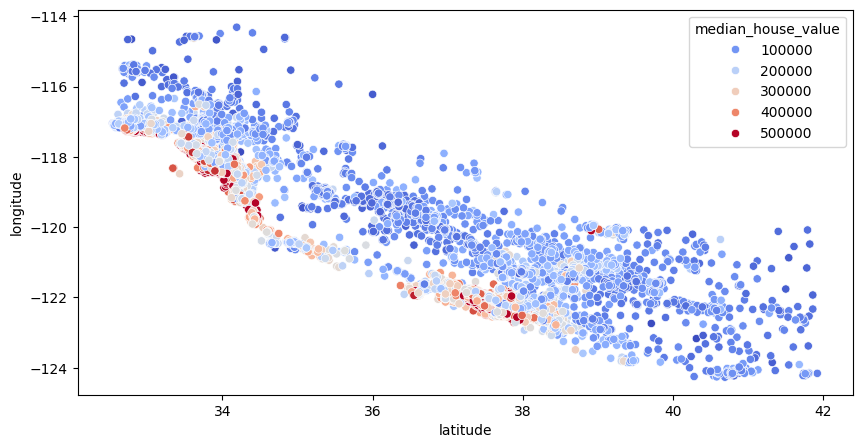

In [371]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'latitude', y = 'longitude', data = training_data, hue = 'median_house_value', palette = 'coolwarm')

In [372]:
training_data['bedroom_ratio'] = training_data['total_bedrooms']/training_data['total_rooms']
training_data['household_rooms'] = training_data['total_rooms']/training_data['households']
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8239,-118.18,33.77,36.0,1833.0,688.0,1128.0,620.0,1.1483,112500.0,0,0,0,0,1,0.375341,2.956452
5485,-118.46,33.99,35.0,1214.0,300.0,478.0,265.0,4.0156,500001.0,1,0,0,0,0,0.247117,4.581132
12813,-121.49,38.63,6.0,12197.0,2617.0,5634.0,2329.0,3.7449,129300.0,0,1,0,0,0,0.214561,5.237012
369,-122.15,37.75,40.0,1445.0,256.0,849.0,255.0,3.8913,126300.0,0,0,0,1,0,0.177163,5.666667
17464,-119.88,34.42,22.0,2367.0,492.0,1333.0,488.0,3.6304,312200.0,0,0,0,0,1,0.207858,4.850410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,-119.60,36.57,42.0,2311.0,439.0,1347.0,436.0,2.5556,69700.0,0,1,0,0,0,0.189961,5.300459
17060,-122.24,37.49,30.0,2956.0,590.0,1191.0,594.0,3.7463,427600.0,0,0,0,0,1,0.199594,4.976431
8445,-118.37,33.91,35.0,1742.0,283.0,812.0,282.0,5.6704,303700.0,1,0,0,0,0,0.162457,6.177305
16801,-122.41,37.66,37.0,2155.0,446.0,1255.0,428.0,3.8438,250700.0,0,0,0,0,1,0.206961,5.035047


<Axes: >

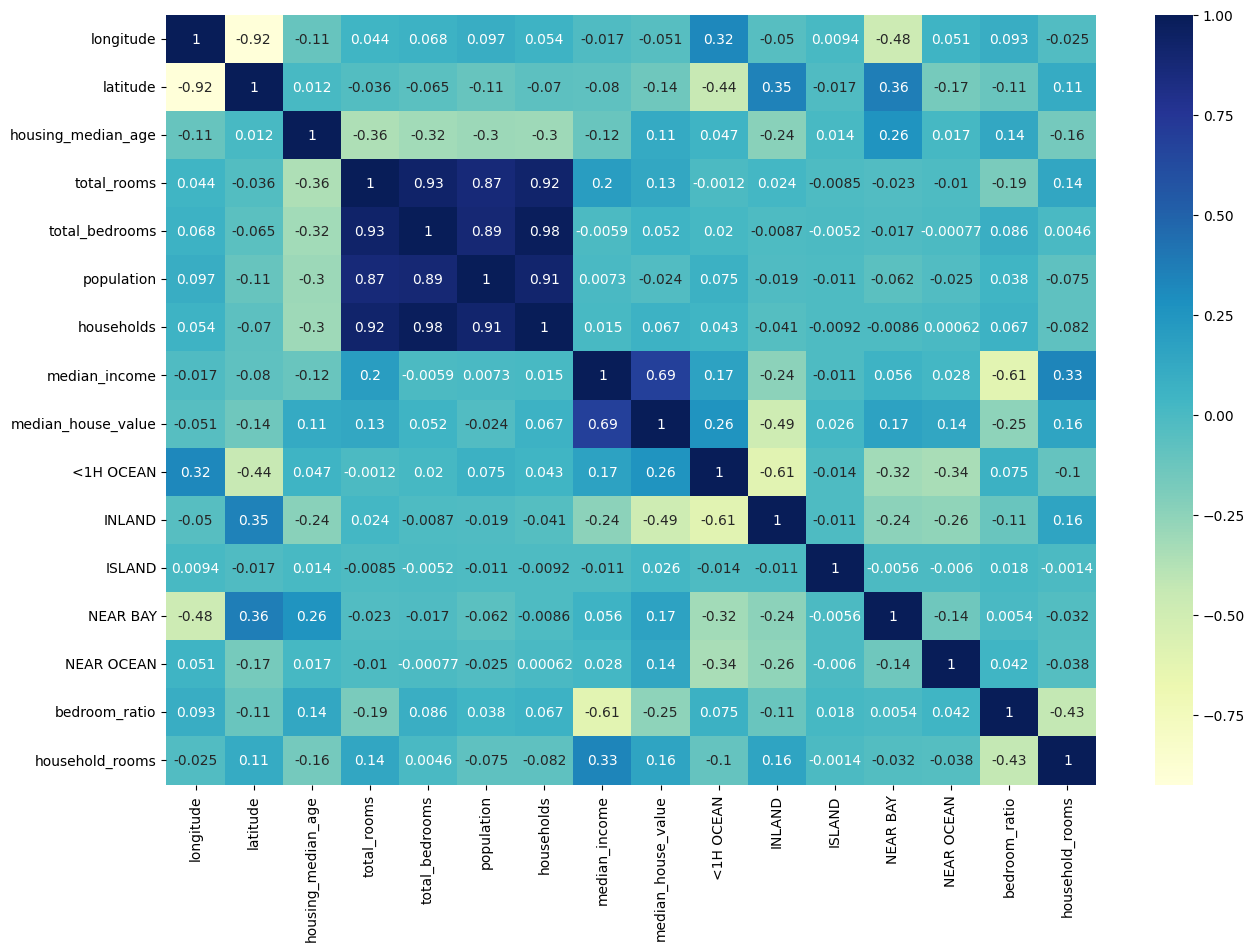

In [373]:
plt.figure(figsize = (15,10))
sns.heatmap(training_data.corr(), annot = True, cmap = 'YlGnBu')

In [374]:
# training(also called fitting) our data with linear regression model
x_train, y_train = training_data.drop(['median_house_value'], axis = 1), training_data['median_house_value']  # training the input data

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [375]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2373,-119.57,36.70,30.0,7.771067,2.171458,7.130099,6.018593,3.1442,INLAND,72300.0
1646,-121.91,37.81,7.0,8.154213,2.214214,7.104144,5.981414,13.1499,INLAND,500001.0
9977,-122.48,38.54,37.0,7.549083,2.145824,6.881411,5.831882,4.2096,INLAND,256600.0
16751,-122.46,37.71,45.0,7.495542,2.139542,7.270313,5.966147,3.6500,NEAR OCEAN,239900.0
14598,-117.18,32.81,19.0,8.828201,2.285256,8.238801,7.319865,3.1032,NEAR OCEAN,179500.0
...,...,...,...,...,...,...,...,...,...,...
7139,-118.12,34.02,36.0,7.375256,2.125282,7.008505,5.886104,2.4286,<1H OCEAN,205600.0
5558,-118.45,33.96,24.0,8.038512,2.201495,6.981006,6.461468,5.7230,<1H OCEAN,500001.0
18535,-122.01,36.97,52.0,6.825460,2.057383,6.265301,5.579730,2.9444,NEAR OCEAN,232800.0
16391,-121.25,38.01,16.0,7.782390,2.172749,6.960348,6.324359,2.6994,INLAND,112500.0


In [376]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype = int))
test_data = test_data.drop(['ocean_proximity'], axis = 1)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2373,-119.57,36.70,30.0,7.771067,2.171458,7.130099,6.018593,3.1442,72300.0,0,1,0,0,0
1646,-121.91,37.81,7.0,8.154213,2.214214,7.104144,5.981414,13.1499,500001.0,0,1,0,0,0
9977,-122.48,38.54,37.0,7.549083,2.145824,6.881411,5.831882,4.2096,256600.0,0,1,0,0,0
16751,-122.46,37.71,45.0,7.495542,2.139542,7.270313,5.966147,3.6500,239900.0,0,0,0,0,1
14598,-117.18,32.81,19.0,8.828201,2.285256,8.238801,7.319865,3.1032,179500.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,-118.12,34.02,36.0,7.375256,2.125282,7.008505,5.886104,2.4286,205600.0,1,0,0,0,0
5558,-118.45,33.96,24.0,8.038512,2.201495,6.981006,6.461468,5.7230,500001.0,1,0,0,0,0
18535,-122.01,36.97,52.0,6.825460,2.057383,6.265301,5.579730,2.9444,232800.0,0,0,0,0,1
16391,-121.25,38.01,16.0,7.782390,2.172749,6.960348,6.324359,2.6994,112500.0,0,1,0,0,0


In [377]:
test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2373,-119.57,36.70,30.0,7.771067,2.171458,7.130099,6.018593,3.1442,72300.0,0,1,0,0,0,0.279429,1.291177
1646,-121.91,37.81,7.0,8.154213,2.214214,7.104144,5.981414,13.1499,500001.0,0,1,0,0,0,0.271542,1.363258
9977,-122.48,38.54,37.0,7.549083,2.145824,6.881411,5.831882,4.2096,256600.0,0,1,0,0,0,0.284250,1.294450
16751,-122.46,37.71,45.0,7.495542,2.139542,7.270313,5.966147,3.6500,239900.0,0,0,0,0,1,0.285442,1.256346
14598,-117.18,32.81,19.0,8.828201,2.285256,8.238801,7.319865,3.1032,179500.0,0,0,0,0,1,0.258859,1.206061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,-118.12,34.02,36.0,7.375256,2.125282,7.008505,5.886104,2.4286,205600.0,1,0,0,0,0,0.288164,1.252994
5558,-118.45,33.96,24.0,8.038512,2.201495,6.981006,6.461468,5.7230,500001.0,1,0,0,0,0,0.273868,1.244069
18535,-122.01,36.97,52.0,6.825460,2.057383,6.265301,5.579730,2.9444,232800.0,0,0,0,0,1,0.301428,1.223260
16391,-121.25,38.01,16.0,7.782390,2.172749,6.960348,6.324359,2.6994,112500.0,0,1,0,0,0,0.279188,1.230542


In [378]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [379]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
2373,-119.57,36.70,30.0,7.771067,2.171458,7.130099,6.018593,3.1442,0,1,0,0,0,0.279429,1.291177
1646,-121.91,37.81,7.0,8.154213,2.214214,7.104144,5.981414,13.1499,0,1,0,0,0,0.271542,1.363258
9977,-122.48,38.54,37.0,7.549083,2.145824,6.881411,5.831882,4.2096,0,1,0,0,0,0.284250,1.294450
16751,-122.46,37.71,45.0,7.495542,2.139542,7.270313,5.966147,3.6500,0,0,0,0,1,0.285442,1.256346
14598,-117.18,32.81,19.0,8.828201,2.285256,8.238801,7.319865,3.1032,0,0,0,0,1,0.258859,1.206061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,-118.12,34.02,36.0,7.375256,2.125282,7.008505,5.886104,2.4286,1,0,0,0,0,0.288164,1.252994
5558,-118.45,33.96,24.0,8.038512,2.201495,6.981006,6.461468,5.7230,1,0,0,0,0,0.273868,1.244069
18535,-122.01,36.97,52.0,6.825460,2.057383,6.265301,5.579730,2.9444,0,0,0,0,1,0.301428,1.223260
16391,-121.25,38.01,16.0,7.782390,2.172749,6.960348,6.324359,2.6994,0,1,0,0,0,0.279188,1.230542


In [380]:
y_test

2373      72300.0
1646     500001.0
9977     256600.0
16751    239900.0
14598    179500.0
           ...   
7139     205600.0
5558     500001.0
18535    232800.0
16391    112500.0
16386     82800.0
Name: median_house_value, Length: 4087, dtype: float64

In [381]:
reg.score(x_test,y_test)

0.591900887612888

In [382]:
# fitting(or training) our data with RandomForest model
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [383]:
forest.score(x_test, y_test)

0.4335737744358876